In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
inputs = df.drop(['target'], axis='columns')
target = df.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [8]:
from sklearn.model_selection import GridSearchCV
cf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [1, 3, 5, 6,10, 15]
}, cv=5, return_train_score=False)

In [9]:
cf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 6, 10, 15]})

In [10]:
cf.best_score_

0.9860820751064653

In [11]:
cf.best_params_

{'n_neighbors': 3}

In [13]:
pd.DataFrame(cf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006390,0.003799,0.051209,0.034199,1,{'n_neighbors': 1},0.975694,0.982639,0.986063,0.989547,0.986063,0.984001,0.004693,2
1,0.003631,0.000221,0.035406,0.006930,3,{'n_neighbors': 3},0.986111,0.986111,0.982578,0.989547,0.986063,0.986082,0.002204,1
2,0.003799,0.000370,0.033186,0.001271,5,{'n_neighbors': 5},0.982639,0.989583,0.975610,0.986063,0.986063,0.983991,0.004731,3
3,0.004247,0.000727,0.035478,0.002584,6,{'n_neighbors': 6},0.982639,0.979167,0.972125,0.979094,0.986063,0.979818,0.004628,4
4,0.004312,0.000478,0.034195,0.001179,10,{'n_neighbors': 10},0.968750,0.986111,0.972125,0.979094,0.986063,0.978429,0.007087,5
5,0.004139,0.000602,0.035017,0.001008,15,{'n_neighbors': 15},0.961806,0.975694,0.965157,0.965157,0.979094,0.969382,0.006742,6


In [15]:
y_predicted = cf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0, 28]])

Text(50.722222222222214, 0.5, 'truth')

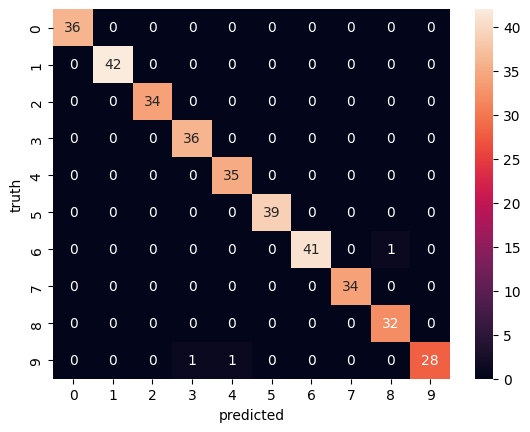

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [21]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        34
           3       0.97      1.00      0.99        36
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        39
           6       1.00      0.98      0.99        42
           7       1.00      1.00      1.00        34
           8       0.97      1.00      0.98        32
           9       1.00      0.93      0.97        30

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

